In [682]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [816]:
train=pd.read_excel(r'C:/pers/saurabh/cloud/ML/Projects/Flight_Prediction/Data_Train.xlsx')
test=pd.read_excel(r'C:/pers/saurabh/cloud/ML/Projects/Flight_Prediction/Test_set.xlsx')

In [725]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [726]:
train.shape

(10683, 11)

In [727]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [728]:
train.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [729]:
train.Total_Stops.unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [730]:
train

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


###  FEATURE ENGINEERING

In [731]:
# Date_of_Journey column will make seperated by date,month and year seperate column

In [732]:
train['Date']=train.Date_of_Journey.str.split('/').str[0]
train['Month']=train.Date_of_Journey.str.split('/').str[1]
train['Year']=train.Date_of_Journey.str.split('/').str[2]

In [733]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
 11  Date             10683 non-null  object
 12  Month            10683 non-null  object
 13  Year             10683 non-null  object
dtypes: int64(1), object(13)
memory usage: 1.1+ MB


In [734]:
#Date ,month and Year columns have all object type, we have to convert it into integer datatype
train['Date']=train['Date'].astype(int)
train['Month']=train['Month'].astype(int)
train['Year']=train['Year'].astype(int)

In [735]:
#Arrival_Time column has date part as well will now split in to only time format
# e.g. 01:10 22 Mar will change 01:10 
train['Arrival_Time']=train['Arrival_Time'].str.split(' ').str[0]

In [736]:
#Total_stops is categorical feature 
print(train['Total_Stops'].unique())
train[train.Total_Stops.isnull()]

['non-stop' '2 stops' '1 stop' '3 stops' nan '4 stops']


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25,23h 40m,NaN,No info,7480,6,5,2019


In [737]:
#Since we have only one record which has nan value , will replace with 1 stop 
train['Total_Stops']=train.Total_Stops.fillna('1 stop')

In [738]:
#Also non-stop can be replcase with 0 stop to perform the label encoding 
train['Total_Stops']=train.Total_Stops.replace('non-stop','0 stop')

In [739]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,0 stop,No info,3897,24,3,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


In [740]:
#Dep_time column will split it into Dep_Hour and Dep_Min
train['Dep_Hour']=train['Dep_Time'].str.split(':').str[0]
train['Dep_Min']=train['Dep_Time'].str.split(':').str[1]

In [741]:
#Arrival_time column will split it into Arr_Hour and Arr_Min
train['Arr_Hour']=train['Arrival_Time'].str.split(':').str[0]
train['Arr_Min']=train['Arrival_Time'].str.split(':').str[1]

In [742]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10683 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
 11  Date             10683 non-null  int32 
 12  Month            10683 non-null  int32 
 13  Year             10683 non-null  int32 
 14  Dep_Hour         10683 non-null  object
 15  Dep_Min          10683 non-null  object
 16  Arr_Hour         10683 non-null  object
 17  Arr_Min          10683 non-null

In [743]:
#will convert new cols into integer data type as are having object data types
# also we can make a function to where we can pass df and colum and dtype which we need to convert into to
train.Dep_Hour=train.Dep_Hour.astype(int)
train.Dep_Min=train.Dep_Min.astype(int)
train.Arr_Hour=train.Arr_Hour.astype(int)
train.Arr_Min=train.Arr_Min.astype(int)

In [744]:
#Now drop those column wfor which we have performed the feture engineering
train.drop(['Date_of_Journey','Dep_Time','Arrival_Time'],axis=1,inplace=True)

In [745]:
# will convert the Total_stop colum to 0,1,2 from 0 stop to 0
train['Total_Stops']=train.Total_Stops.str.split(' ').str[0]

In [746]:
train.Total_Stops.unique()

array(['0', '2', '1', '3', '4'], dtype=object)

In [747]:
#convert the Total_stops the datatype to int
train['Total_Stops']=train.Total_Stops.astype(int)

In [748]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10682 non-null  object
 4   Duration         10683 non-null  object
 5   Total_Stops      10683 non-null  int32 
 6   Additional_Info  10683 non-null  object
 7   Price            10683 non-null  int64 
 8   Date             10683 non-null  int32 
 9   Month            10683 non-null  int32 
 10  Year             10683 non-null  int32 
 11  Dep_Hour         10683 non-null  int32 
 12  Dep_Min          10683 non-null  int32 
 13  Arr_Hour         10683 non-null  int32 
 14  Arr_Min          10683 non-null  int32 
dtypes: int32(8), int64(1), object(6)
memory usage: 918.2+ KB


In [749]:
train.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_Hour,Dep_Min,Arr_Hour,Arr_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2,No info,13882,9,6,2019,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1,No info,6218,12,5,2019,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1,No info,13302,1,3,2019,16,50,21,35


In [750]:
#we have tottal max arrow for route column = 5
train[train.Route.str.len()==33]

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_Hour,Dep_Min,Arr_Hour,Arr_Min
9182,Air India,Banglore,New Delhi,BLR → CCU → BBI → HYD → VGA → DEL,29h 30m,4,Change airports,17686,1,3,2019,5,50,11,20


In [751]:
train[train.Route.str.len()==33].Route.str.split('→')

9182    [BLR ,  CCU ,  BBI ,  HYD ,  VGA ,  DEL]
Name: Route, dtype: object

In [752]:
#below logic will not work since , previous value will be updated with NAN
#lst=[2,3,4,5,6]
#for i in range(len(lst)):
#    for j in range(lst[i]):
#        print(lst[i],j)
#        train_route['Route_'+str(j+1)]=train[train.Route.str.split('→').str.len()==lst[i]].Route.str.split('→').str[j]
        
        
        

In [753]:
train['Route_1']=train.Route.str.split('→').str[0]
train['Route_2']=train.Route.str.split('→').str[1]
train['Route_3']=train.Route.str.split('→').str[2]
train['Route_4']=train.Route.str.split('→').str[3]
train['Route_5']=train.Route.str.split('→').str[4]
train['Route_6']=train.Route.str.split('→').str[5] 

In [754]:
train.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,...,Dep_Hour,Dep_Min,Arr_Hour,Arr_Min,Route_1,Route_2,Route_3,Route_4,Route_5,Route_6
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0,No info,3897,24,3,...,22,20,1,10,BLR,DEL,NaN,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662,1,5,...,5,50,13,15,CCU,IXR,BBI,BLR,NaN,NaN
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2,No info,13882,9,6,...,9,25,4,25,DEL,LKO,BOM,COK,NaN,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1,No info,6218,12,5,...,18,5,23,30,CCU,NAG,BLR,NaN,NaN,NaN
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1,No info,13302,1,3,...,16,50,21,35,BLR,NAG,DEL,NaN,NaN,NaN


In [755]:
train['Route_1'].fillna('None',inplace=True)
train['Route_2'].fillna('None',inplace=True)
train['Route_3'].fillna('None',inplace=True)
train['Route_4'].fillna('None',inplace=True)
train['Route_5'].fillna('None',inplace=True)
train['Route_6'].fillna('None',inplace=True)



In [756]:
train.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,...,Dep_Hour,Dep_Min,Arr_Hour,Arr_Min,Route_1,Route_2,Route_3,Route_4,Route_5,Route_6
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0,No info,3897,24,3,...,22,20,1,10,BLR,DEL,None,None,None,None
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662,1,5,...,5,50,13,15,CCU,IXR,BBI,BLR,None,None
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2,No info,13882,9,6,...,9,25,4,25,DEL,LKO,BOM,COK,None,None
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1,No info,6218,12,5,...,18,5,23,30,CCU,NAG,BLR,None,None,None
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1,No info,13302,1,3,...,16,50,21,35,BLR,NAG,DEL,None,None,None


In [757]:
train.drop(['Route'],inplace=True,axis=1)

In [758]:
train.drop(['Duration'],inplace=True,axis=1)

In [759]:
train.head(10)

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_Hour,Dep_Min,Arr_Hour,Arr_Min,Route_1,Route_2,Route_3,Route_4,Route_5,Route_6
0,IndiGo,Banglore,New Delhi,0,No info,3897,24,3,2019,22,20,1,10,BLR,DEL,None,None,None,None
1,Air India,Kolkata,Banglore,2,No info,7662,1,5,2019,5,50,13,15,CCU,IXR,BBI,BLR,None,None
2,Jet Airways,Delhi,Cochin,2,No info,13882,9,6,2019,9,25,4,25,DEL,LKO,BOM,COK,None,None
3,IndiGo,Kolkata,Banglore,1,No info,6218,12,5,2019,18,5,23,30,CCU,NAG,BLR,None,None,None
4,IndiGo,Banglore,New Delhi,1,No info,13302,1,3,2019,16,50,21,35,BLR,NAG,DEL,None,None,None
5,SpiceJet,Kolkata,Banglore,0,No info,3873,24,6,2019,9,0,11,25,CCU,BLR,None,None,None,None
6,Jet Airways,Banglore,New Delhi,1,In-flight meal not included,11087,12,3,2019,18,55,10,25,BLR,BOM,DEL,None,None,None
7,Jet Airways,Banglore,New Delhi,1,No info,22270,1,3,2019,8,0,5,5,BLR,BOM,DEL,None,None,None
8,Jet Airways,Banglore,New Delhi,1,In-flight meal not included,11087,12,3,2019,8,55,10,25,BLR,BOM,DEL,None,None,None
9,Multiple carriers,Delhi,Cochin,1,No info,8625,27,5,2019,11,25,19,15,DEL,BOM,COK,None,None,None


In [760]:
#check the missing value
train.isnull().sum()

Airline            0
Source             0
Destination        0
Total_Stops        0
Additional_Info    0
Price              0
Date               0
Month              0
Year               0
Dep_Hour           0
Dep_Min            0
Arr_Hour           0
Arr_Min            0
Route_1            0
Route_2            0
Route_3            0
Route_4            0
Route_5            0
Route_6            0
dtype: int64

In [765]:
#will do label encoding as there will be importance for the coulmns value, e.g blr tp del flight price will be different from the
#KOL chennai
from sklearn.preprocessing import LabelEncoder
encode=LabelEncoder()

In [762]:
train['Airline']=encode.fit_transform(train['Airline'])
train['Source']=encode.fit_transform(train['Source'])
train['Destination']=encode.fit_transform(train['Destination'])
train['Additional_Info']=encode.fit_transform(train['Additional_Info'])
train['Route_1']=encode.fit_transform(train['Route_1'])
train['Route_2']=encode.fit_transform(train['Route_2'])
train['Route_3']=encode.fit_transform(train['Route_3'])
train['Route_4']=encode.fit_transform(train['Route_4'])
train['Route_5']=encode.fit_transform(train['Route_5'])
train['Route_6']=encode.fit_transform(train['Route_6'])


In [763]:
train.head(10)

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_Hour,Dep_Min,Arr_Hour,Arr_Min,Route_1,Route_2,Route_3,Route_4,Route_5,Route_6
0,3,0,5,0,8,3897,24,3,2019,22,20,1,10,0,13,29,13,5,1
1,1,3,0,2,8,7662,1,5,2019,5,50,13,15,2,25,1,3,5,1
2,4,2,1,2,8,13882,9,6,2019,9,25,4,25,3,32,4,5,5,1
3,3,3,0,1,8,6218,12,5,2019,18,5,23,30,2,34,3,13,5,1
4,3,0,5,1,8,13302,1,3,2019,16,50,21,35,0,34,8,13,5,1
5,8,3,0,0,8,3873,24,6,2019,9,0,11,25,2,5,29,13,5,1
6,4,0,5,1,5,11087,12,3,2019,18,55,10,25,0,7,8,13,5,1
7,4,0,5,1,8,22270,1,3,2019,8,0,5,5,0,7,8,13,5,1
8,4,0,5,1,5,11087,12,3,2019,8,55,10,25,0,7,8,13,5,1
9,6,2,1,1,8,8625,27,5,2019,11,25,19,15,3,7,6,13,5,1


In [764]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Airline          10683 non-null  int32
 1   Source           10683 non-null  int32
 2   Destination      10683 non-null  int32
 3   Total_Stops      10683 non-null  int32
 4   Additional_Info  10683 non-null  int32
 5   Price            10683 non-null  int64
 6   Date             10683 non-null  int32
 7   Month            10683 non-null  int32
 8   Year             10683 non-null  int32
 9   Dep_Hour         10683 non-null  int32
 10  Dep_Min          10683 non-null  int32
 11  Arr_Hour         10683 non-null  int32
 12  Arr_Min          10683 non-null  int32
 13  Route_1          10683 non-null  int32
 14  Route_2          10683 non-null  int32
 15  Route_3          10683 non-null  int32
 16  Route_4          10683 non-null  int32
 17  Route_5          10683 non-null  int32
 18  Route_

### Feature Selection

In [769]:
#Now will perform the feture selection , what are all features we need in order to use in machine learning algorith
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso

In [775]:
#Perform Train Test Split
from sklearn.model_selection import train_test_split

In [772]:
y=train['Price']
X=train.drop(['Price'],axis=1)

In [776]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [778]:
model=SelectFromModel(Lasso(alpha=.005,random_state=0))

In [779]:
model.fit(X_train,y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, copy_X=True, fit_intercept=True,
                                max_iter=1000, normalize=False, positive=False,
                                precompute=False, random_state=0,
                                selection='cyclic', tol=0.0001,
                                warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [783]:
model.get_support()

array([ True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False])

In [784]:
selected_feature=X_train.columns[model.get_support()]

In [786]:
selected_feature

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Date', 'Month', 'Dep_Hour', 'Dep_Min', 'Arr_Hour', 'Arr_Min',
       'Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5'],
      dtype='object')

In [787]:
X_train=X_train.drop(['Year'],axis=1)

In [801]:
X_train.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Date,Month,Dep_Hour,Dep_Min,Arr_Hour,Arr_Min,Route_1,Route_2,Route_3,Route_4,Route_5,Route_6
7106,8,0,2,0,8,6,4,5,55,8,35,0,13,29,13,5,1
7904,1,2,1,1,8,1,6,5,15,6,50,3,40,6,13,5,1
4861,4,2,1,2,5,12,6,14,35,12,35,3,34,4,5,5,1
9375,3,2,1,1,8,15,6,6,40,21,0,3,7,6,13,5,1
155,1,3,0,2,8,9,5,8,20,7,55,2,28,4,3,5,1


In [802]:
X_test=X_test.drop(['Year'],axis=1)

### ML implementation for the above price prediction 
##### RandomForestRegressor

In [789]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

In [790]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [792]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [793]:
rf = RandomForestRegressor()

In [794]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 50, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [795]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   1.4s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   1.2s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   1.2s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   1.2s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   1.2s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=20 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=20, total=   3.0s
[CV] n_estimators=200, min_samples_spl

[CV]  n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10, total=   4.9s
[CV] n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10, total=   5.0s
[CV] n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10, total=   4.6s
[CV] n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10, total=   4.3s
[CV] n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10, total=   4.1s
[CV] n_estimators=100, mi

[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, total=   7.9s
[CV] n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, total=   8.2s
[CV] n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, total=   8.1s
[CV] n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, total=   8.2s
[CV] n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, total=   7.8s
[CV] n_estimators=1200, min_samples_split=100, min_s

[CV]  n_estimators=1200, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25, total=   5.4s
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   1.6s
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   1.5s
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   1.6s
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   1.5s
[CV] n_estimators=300, min_samples_split=

[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=20, total=   8.7s
[CV] n_estimators=500, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=20 
[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=20, total=   8.6s
[CV] n_estimators=900, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25 
[CV]  n_estimators=900, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25, total=   4.5s
[CV] n_estimators=900, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25 
[CV]  n_estimators=900, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25, total=   4.9s
[CV] n_estimators=900, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25 
[CV]  n_estimators=900, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25, total=   4.6s
[CV] n_estimators=900, min_samples_split

[CV]  n_estimators=1200, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=30, total=   6.2s
[CV] n_estimators=1200, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=30 
[CV]  n_estimators=1200, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=30, total=   6.1s
[CV] n_estimators=1200, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=30 
[CV]  n_estimators=1200, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=30, total=   6.2s
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=30 
[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=30, total=   3.4s
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=30 
[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=30, total=   3.4s
[CV] n_estimators=600, min_samples_split=10

[CV]  n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   2.8s
[CV] n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5 
[CV]  n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   3.0s
[CV] n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5 
[CV]  n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   2.7s
[CV] n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5 
[CV]  n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   2.7s
[CV] n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=30 
[CV]  n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=30, total=   3.7s
[CV] n_estimators=900, min_samples_split=

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed: 18.3min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [807]:
y_pred=rf_random.predict(X_test)

In [808]:
rf_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

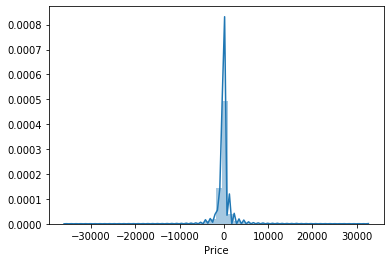

In [806]:
sns.distplot(y_test-y_pred)

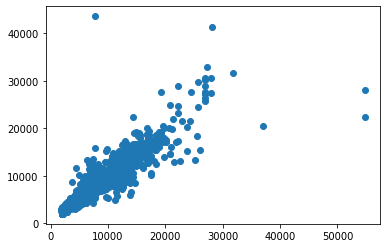

In [815]:
plt.scatter(y_test,y_pred)

In [823]:
test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [822]:
rf_random.predict([[3,0,5,0,8,24,3,22,23,2,10,2,25,1,4,5,3]])

array([6618.59788889])